In [1]:
from numpy import *
from scipy import *
import numpy as np
from matplotlib import *

from scipy import integrate
from scipy import interpolate
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

import xlrd
import xlsxwriter

rc('text',usetex = True)
rc('font', family='serif',size = 12)

In [2]:
Data = xlrd.open_workbook('AMR_Inputs.xlsx')
Eff = Data.sheet_by_name('Eff')


Effect = []

for i in range(7):
     Effect.append(array(Eff.col_values(i)))

phi = np.arange(0.1,2.01,0.1)
NTU = np.arange(50,351,50)
NN,PP = np.meshgrid(NTU,phi)
Effectiv = interpolate.interp2d(phi,NTU,Effect,kind = 'linear')

In [246]:
Data = xlrd.open_workbook('AMR_Inputs.xlsx')
HEx = Data.sheet_by_name('HEx_Cold')

m_f_HEx_c   = array(HEx.col_values(0)) 
Ec_HEx_c   = array(HEx.col_values(1)) 
W_T_HEx_c   = array(HEx.col_values(2)) 
W_f_HEx_c   = array(HEx.col_values(3)) 
W_p_HEx_c   = array(HEx.col_values(4)) 

In [247]:
Data = xlrd.open_workbook('AMR_Inputs.xlsx')
HEx = Data.sheet_by_name('HEx_Hot')

m_f_HEx_h   = array(HEx.col_values(0)) 
Ec_HEx_h   = array(HEx.col_values(1)) 
W_T_HEx_h   = array(HEx.col_values(2)) 
W_f_HEx_h   = array(HEx.col_values(3)) 
W_p_HEx_h   = array(HEx.col_values(4)) 

In [248]:
def HEx_Power(m_f_HEx,W_T_HEx,W_f_HEx,W_p_HEx,Ec_HEx,m_f,ECr):
    A = 0
    B = 9
    
    for i in range(len(m_f_HEx)-1):
        if np.round(m_f,4) == np.round(m_f_HEx[i],4) and np.round(m_f,4) < np.round(m_f_HEx[i+1],4):
            B = i
            #print(B)
            break
    #print(B,m_f,m_f_HEx[B],m_f_HEx[B+1])
    for i in range(B,0,-1):
        if m_f_HEx[i] == m_f_HEx[B]:
            A = i
        else:
            break
    #print(A,B,m_f_HEx[A],m_f_HEx[B])
    C = B
    D = A
    for i in range(A,B):
        if abs(ECr-Ec_HEx[i]) < abs(ECr-Ec_HEx[C]) and ECr < Ec_HEx[i]:
            #print('oic')
            C = i
        if abs(ECr-Ec_HEx[i]) < abs(ECr-Ec_HEx[D]) and ECr > Ec_HEx[i]:
            #print('oid')
            D = i
    #print(C,D,Ec_HEx[C],Ec_HEx[D])
    W_T = W_T_HEx[C]+(W_T_HEx[D]-W_T_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])
    W_f = W_f_HEx[C]+(W_f_HEx[D]-W_f_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])
    W_p = W_p_HEx[C]+(W_p_HEx[D]-W_p_HEx[C])*(ECr - Ec_HEx[C])/(Ec_HEx[D] - Ec_HEx[C])          
    return(W_T,W_f,W_p)

In [236]:
np.round(m_f_HEx_c[591],4)

533.3333

In [237]:
i = 170
round(4*m_f_target[i]/6,4)==round(m_f_HEx_c[597],4),ECr_c[i]

(True, 0.07818500171494798)

In [238]:
HEx_Power(m_f_HEx_c,W_T_HEx_c,W_f_HEx_c,W_p_HEx_c,Ec_HEx_c,4*m_f_target[170]/6,ECr_c[170])

(94.70991577059458, 83.68629676444611, 11.02361900614847)

In [6]:
def Radius(X): 
    R2,R3,B = X
    return (1.41634776*(R2**-1.10684344)*(R3**2.08169412)*(B**0.74232364))

In [7]:
def Qc(X): 
    P1,P2,P3,P4,P5= X #Q_pas_CB,Q_act_CB,Q_span,W_mag,W_p
    return (0.5124256*P1+0.573295*P2-0.52893772*P3-0.00821663*P4-1.2800057*P5)

In [8]:
def Qh(X): 
    P1,P2,P3,P4,P5= X
    return (0.7308924*P1+1.31973655*P2-0.7599739*P3+0.01339801*P4-0.85528785*P5)

In [9]:
def W_Hex(X):
    P1,P2 = X
    return (a*P1**b + c*P2**d)

In [10]:
def Prop_param(X):
    T_c,T_h,B = X
    C_H = 1.65161038/100*T_c+2.59946197*T_h-1.14324309*100*B
    C_L = 10.16443738*T_c-5.32568341*T_h-0.71305997*B
    dT_mg = -0.01057708*T_c+0.01163704*T_h+1.73509682*B
    dT_dmg = -0.01229483*T_c+0.01376157*T_h+0.76454655*B
    CdT_mg = -9.517569*T_c+11.49711993*T_h+820.04168503*B
    CdT_dmg = 4.39480124*T_c-7.07931118/10*T_h+9.15928168*100*B
    return(C_H,C_L,dT_mg,dT_dmg,CdT_mg,CdT_dmg)

In [11]:
Data = xlrd.open_workbook('AMR_Inputs.xlsx') #Import inputs File
Inputs = Data.sheet_by_name('Data') 

L   = array(Inputs.col_values(0)) #Import AMR Length [mm]
H   = array(Inputs.col_values(1)) #Import AMR Height [mm]
W   = array(Inputs.col_values(2)) #Import AMR Width [mm]
T_c = array(Inputs.col_values(3))+273.15 #Import temperature span [K]
T_h = array(Inputs.col_values(4))+273.15 #Import temperature span [K]
B   = array(Inputs.col_values(5)) #Import magnetic field [T]
f   = array(Inputs.col_values(6)) #Import frequency [Hz]
m_f = array(Inputs.col_values(7))/3600 #Import mass flow rate [kg/h]
Q_c = array(Inputs.col_values(8)) #Import Cooling capacity [W]
Q_h = array(Inputs.col_values(9)) #Import Rejected heat [W]
W_p = array(Inputs.col_values(10)) #Import Pumping power [W]
W_m = array(Inputs.col_values(11)) #Import Magnetic power [W]
T_c_ml = array(Inputs.col_values(12))+273.15 #Import temperature span [K]
T_h_ml = array(Inputs.col_values(13))+273.15 #Import temperature span [K]

Calculation

In [12]:
def Optimal(m_f,FE,f,L,H,W,B,Tc,Th,Tce,The):
    
    ##Properties of the solid 
    rho_s = 7900  #[kg/m3] Density of the solid
    k_s   = 8 #[W/(m2.K)] #Thermal conductivity of the solid

    ## Propertis of the fluid
    rho_f = 1000  #[kg/m3] Density of the fluid
    c_f   = 4181  #[kJ/(kg.K)] # Specific heat of the fluid
    Pr_f  = 6.136 #[-] Prandtl of the fluid
    mu_f  = 0.00061 #0.0008901 #[kg/m-2] #Viscosity of the fluid
    k_f   = 0.6065  #[W/(m2.K)] #Thermal conductivity of the fluid

    ## Porous medium
    d_p = 500*10**(-6) #[m] Particle diameter
    Epsilon = 0.45  #[-] Porosity

    #Magnetic Circuit
    B_rem = 1.35
    N_p = 2
    N_Rp = 2
    
    ### CALCULATION ###
    
    #Porous medium
    m_s   = L*W*H*10**-9*(1-Epsilon)*rho_s #mass of the AMR
    Beta = (1-Epsilon)*6/d_p
    v_s   = (m_f)/(rho_f*W*H*10**-6) #Superficial velocity

    #Dimensionless Numbers
    Re_dp = d_p*v_s*rho_f/((1-Epsilon)*mu_f) #Reynolds number
    Nu = 2*(1+4*(1-Epsilon)/Epsilon)+((1-Epsilon)**0.5)*Re_dp**0.6*Pr_f**(1/3) # Nusselt number
    Pe = Re_dp*Pr_f
    h_int = Nu*k_f/d_p
    NTU_f  = h_int*Beta*(L*W*H*10**(-9))/(m_f*c_f) 
    dP = (L/1000)*(150*(1-Epsilon)**2*mu_f*v_s/(Epsilon**3*d_p**2) + 1.75*(1-Epsilon)*rho_f*v_s**2/(Epsilon**3*d_p))

    #Effective conduction
    k_e_f = k_f*Epsilon #Fluid effective conduction

    a_0 = exp(-1.084-6.778*(Epsilon-0.298))
    f_0 = 0.8
    k_e_s = k_f*((1-a_0)*(Epsilon*f_0+(1-Epsilon*f_0)*k_s/k_f)/(1-Epsilon*(1-f_0)+k_s/k_f*Epsilon*(1-f_0))+a_0*(2*((k_s/k_f)**2)*(1-Epsilon)+(1+2*Epsilon)*k_s/k_f)/((2+Epsilon)*k_s/k_f+(1-Epsilon))) #Solid effective conduction

    D_ = (k_f*rho_f/c_f)*0.75*Pe/2

    k_s_eff = k_e_s
    k_f_eff = k_e_f + rho_f*c_f*D_
    
    ##### Properties Calculation ######   
    C_H,C_L,dT_mg,dT_dmg,CdT_mg,CdT_dmg = Prop_param((Tce,The,B))

    ##### Porous media effectivness #####

    C_HB = ((m_f)*c_f)/(m_s*C_L*f)
    C_CB = ((m_f)*c_f)/(m_s*C_H*f)

    Efness_HB = Effectiv(C_HB/2,NTU_f)
    Efness_CB = Effectiv(C_CB/2,NTU_f)

    #print(Efness_HB,Efness_CB,h_int,Nu,v_s,Re_dp)


    ## Metrics ##

    Q_pas_CB = Efness_CB*(The - Tce)*m_f*FE*c_f
    Q_act_CB = dT_mg*m_f*c_f*FE

    Q_pas_HB = Efness_HB*(The - Tce)*m_f*FE*c_f
    Q_act_HB = dT_dmg*m_f*c_f*FE

    Q_span = (The - Tce)*m_f*c_f*FE
    Q_cond = ((1-Epsilon)*k_s_eff + Epsilon*k_f_eff)*(W*H*10**-6)*(The-Tce)/L
    W_mag  = m_s*f*(CdT_mg - CdT_dmg)
    W_pump = dP*m_f/rho_f*2*(FE)
    #print(Q_pas_CB,Q_act_CB,Q_span,W_mag,W_pump)

    ######Calculation#######
    
    N_reg = 4/FE

    Qc_reg = Qc((Q_pas_CB,Q_act_CB,Q_span,W_mag,W_pump))
    Qh_reg = Qh((Q_pas_HB,Q_act_HB,Q_span,W_mag,W_pump))

    #N_reg = Qc_target/Qc_reg
    Qc_target = Qc_reg*N_reg 
    Qh_target = Qh_reg*N_reg

    ECr_c = Qc_target/(FE*N_reg*m_f*c_f*(Tc-Tce))
    ECr_h = Qh_target/(FE*N_reg*m_f*c_f*(The-Th))
    
    B_rem = 1.35
    
    R2 = [W/2+2.5]/np.tan(np.pi/N_reg)
    R_aux = np.sqrt(R2**2-(W/2**2))
    R3 = np.sqrt((H+8+R_aux)**2+(W/2)**2)
    R4 = Radius((R2,R3,1.1*B/B_rem))
    
    W_mag = Qh_reg - Qc_reg - W_pump
    
    
    return (Qc_target,ECr_c,ECr_h,R4,R3,R2,W_mag,W_pump,Qh_target)

In [13]:
Qc_rg = []
Qh_rg = []
W_pump_rg =[]
ECr_c = []
ECr_h = []
N_r = []
R2 = []
R3 = []
R4 = []

for i in range(len(L)):                          
    A1,A2,A3,A4,A5,A6,A7,A8,A9 = Optimal(m_f[i],0.25,f[i],L[i],H[i],W[i],B[i],22+273.15,35+273.15,T_c[i],T_h[i])
    Qc_rg.append(A1)
    Qh_rg.append(A9)
    W_pump_rg.append(A8)
    ECr_c.append(A2)
    ECr_h.append(A3)
    N_r.append(A6)
    R2.append(A6)
    R3.append(A5)
    R4.append(A4)

In [14]:
m_f = np.arange(450,801,5)/3600
FE  = np.arange(25/100,30/100,5/100) 
f = np.arange(1.5,1.6,1)
L = np.arange(120,181,10)
H = np.arange(20,36,5)
W = np.arange(45,71,5)
B_max = np.arange(1.3,1.41,0.05)
Tce = np.arange(10,15,2)
The = np.arange(43,48,2)

In [15]:
len(FE)*len(f)*len(L)*len(H)*len(W)*len(Tce)*len(The)*len(B_max)

4536

In [16]:
Q_c = []
cont = 0

T_c = 22
T_h = 35

Q_c_target = 2900

m_f_target = []
FE_target = []
f_target = []
L_target = []
H_target = []
W_target = []
Tce_target = []
The_target = []
ECr_c = []
ECr_h = []
R4 = []
R3 = []
R2 = []
W_mag = []
W_pump = []
B_target = []
Q_h = []

for i in range(size(FE)):
    for j in range(len(f)):
        for k in range(len(L)):
            for l in range(len(H)):
                for m in range(len(W)):
                    for n in range(len(Tce)):
                        for o in range(len(The)):
                            for p in range(len(B_max)):
                                it = 0
                                Q_c_system = 0
                                while Q_c_system < Q_c_target and it < len(m_f):
                                    A,B,C,D,E,F,G,A1,A2 = Optimal(m_f[it],FE[i],f[j],L[k],H[l],W[m],B_max[p],T_c+273.15,T_h+273.15,Tce[n]+273.15,The[o]+273.15)
                                    Q_c_system = A[0]
                                    it = it + 1
                                #print(it,Q_c_system)
                                if Q_c_system > Q_c_target:
                                    Q_c.append(Q_c_system)
                                    m_f_target.append(3600*m_f[it-1])
                                    FE_target.append(FE[i])
                                    f_target.append(f[j])
                                    L_target.append(L[k])
                                    H_target.append(H[l])
                                    W_target.append(W[m])
                                    Tce_target.append(Tce[n])
                                    The_target.append(The[o])
                                    B_target.append(B_max[p])
                                    ECr_c.append(B[0])
                                    ECr_h.append(C[0])
                                    R4.append(D[0])
                                    R3.append(E[0])
                                    R2.append(F[0])
                                    W_mag.append(G[0])
                                    W_pump.append(A1)
                                    Q_h.append(A2[0])

                                cont = cont+1
                                print(100*cont/(len(FE)*len(f)*len(L)*len(H)*len(W)*len(Tce)*len(The)*len(B_max)))
                            

0.02204585537918871
0.04409171075837742
0.06613756613756613
0.08818342151675485
0.11022927689594356
0.13227513227513227
0.15432098765432098
0.1763668430335097
0.1984126984126984
0.2204585537918871
0.24250440917107582
0.26455026455026454
0.2865961199294533
0.30864197530864196
0.3306878306878307
0.3527336860670194
0.3747795414462081
0.3968253968253968
0.41887125220458554
0.4409171075837742
0.46296296296296297
0.48500881834215165
0.5070546737213404
0.5291005291005291
0.5511463844797179
0.5731922398589065
0.5952380952380952
0.6172839506172839
0.6393298059964727
0.6613756613756614
0.6834215167548501
0.7054673721340388
0.7275132275132276
0.7495590828924162
0.7716049382716049
0.7936507936507936
0.8156966490299824
0.8377425044091711
0.8597883597883598
0.8818342151675485
0.9038800705467372
0.9259259259259259
0.9479717813051146
0.9700176366843033
0.9920634920634921
1.0141093474426808
1.0361552028218695
1.0582010582010581
1.0802469135802468
1.1022927689594357
1.1243386243386244
1.146384479717813


10.141093474426809
10.163139329805997
10.185185185185185
10.207231040564373
10.229276895943563
10.251322751322752
10.27336860670194
10.295414462081128
10.317460317460318
10.339506172839506
10.361552028218695
10.383597883597883
10.405643738977073
10.427689594356261
10.44973544973545
10.471781305114638
10.493827160493828
10.515873015873016
10.537918871252204
10.559964726631394
10.582010582010582
10.60405643738977
10.626102292768959
10.648148148148149
10.670194003527337
10.692239858906525
10.714285714285714
10.736331569664904
10.758377425044092
10.78042328042328
10.802469135802468
10.824514991181658
10.846560846560847
10.868606701940035
10.890652557319225
10.912698412698413
10.934744268077601
10.95679012345679
10.97883597883598
11.000881834215168
11.022927689594356
11.044973544973544
11.067019400352734
11.089065255731922
11.11111111111111
11.133156966490299
11.155202821869489
11.177248677248677
11.199294532627865
11.221340388007055
11.243386243386244
11.265432098765432
11.28747795414462
1

20.127865961199294
20.149911816578484
20.17195767195767
20.19400352733686
20.21604938271605
20.238095238095237
20.260141093474427
20.282186948853617
20.304232804232804
20.326278659611994
20.34832451499118
20.37037037037037
20.39241622574956
20.414462081128747
20.436507936507937
20.458553791887127
20.480599647266313
20.502645502645503
20.52469135802469
20.54673721340388
20.56878306878307
20.590828924162256
20.612874779541446
20.634920634920636
20.656966490299823
20.679012345679013
20.701058201058203
20.72310405643739
20.74514991181658
20.767195767195766
20.789241622574956
20.811287477954146
20.833333333333332
20.855379188712522
20.877425044091712
20.8994708994709
20.92151675485009
20.943562610229275
20.965608465608465
20.987654320987655
21.00970017636684
21.03174603174603
21.05379188712522
21.075837742504408
21.097883597883598
21.119929453262788
21.141975308641975
21.164021164021165
21.18606701940035
21.20811287477954
21.23015873015873
21.252204585537918
21.274250440917108
21.2962962962

30.29100529100529
30.31305114638448
30.335097001763668
30.357142857142858
30.379188712522044
30.401234567901234
30.423280423280424
30.44532627865961
30.4673721340388
30.48941798941799
30.511463844797177
30.533509700176367
30.555555555555557
30.577601410934744
30.599647266313934
30.62169312169312
30.64373897707231
30.6657848324515
30.687830687830687
30.709876543209877
30.731922398589067
30.753968253968253
30.776014109347443
30.798059964726633
30.82010582010582
30.84215167548501
30.864197530864196
30.886243386243386
30.908289241622576
30.930335097001763
30.952380952380953
30.974426807760143
30.99647266313933
31.01851851851852
31.040564373897706
31.062610229276896
31.084656084656086
31.106701940035272
31.128747795414462
31.150793650793652
31.17283950617284
31.19488536155203
31.21693121693122
31.238977072310405
31.261022927689595
31.28306878306878
31.30511463844797
31.32716049382716
31.349206349206348
31.371252204585538
31.393298059964728
31.415343915343914
31.437389770723104
31.4594356261

40.58641975308642
40.60846560846561
40.6305114638448
40.65255731922399
40.67460317460318
40.69664902998236
40.71869488536155
40.74074074074074
40.76278659611993
40.78483245149912
40.8068783068783
40.82892416225749
40.85097001763668
40.87301587301587
40.89506172839506
40.91710758377425
40.939153439153436
40.961199294532626
40.983245149911816
41.00529100529101
41.0273368606702
41.04938271604938
41.07142857142857
41.09347442680776
41.11552028218695
41.13756613756614
41.15961199294533
41.18165784832451
41.2037037037037
41.22574955908289
41.24779541446208
41.26984126984127
41.291887125220455
41.313932980599645
41.335978835978835
41.358024691358025
41.380070546737215
41.402116402116405
41.42416225749559
41.44620811287478
41.46825396825397
41.49029982363316
41.51234567901235
41.53439153439153
41.55643738977072
41.57848324514991
41.6005291005291
41.62257495590829
41.64462081128748
41.666666666666664
41.688712522045854
41.710758377425044
41.732804232804234
41.754850088183424
41.77689594356261
4

50.83774250440917
50.85978835978836
50.88183421516755
50.903880070546734
50.925925925925924
50.947971781305114
50.970017636684304
50.992063492063494
51.014109347442684
51.03615520282187
51.05820105820106
51.08024691358025
51.10229276895944
51.12433862433863
51.14638447971781
51.168430335097
51.19047619047619
51.21252204585538
51.23456790123457
51.25661375661376
51.27865961199294
51.30070546737213
51.32275132275132
51.34479717813051
51.3668430335097
51.388888888888886
51.410934744268076
51.432980599647266
51.455026455026456
51.477072310405646
51.499118165784836
51.52116402116402
51.54320987654321
51.5652557319224
51.58730158730159
51.60934744268078
51.63139329805996
51.65343915343915
51.67548500881834
51.69753086419753
51.71957671957672
51.74162257495591
51.763668430335095
51.785714285714285
51.807760141093475
51.829805996472665
51.851851851851855
51.87389770723104
51.89594356261023
51.91798941798942
51.94003527336861
51.9620811287478
51.98412698412698
52.00617283950617
52.0282186948853

60.82451499118166
60.84656084656085
60.86860670194004
60.89065255731922
60.91269841269841
60.9347442680776
60.95679012345679
60.97883597883598
61.000881834215164
61.022927689594354
61.044973544973544
61.067019400352734
61.089065255731924
61.111111111111114
61.1331569664903
61.15520282186949
61.17724867724868
61.19929453262787
61.22134038800706
61.24338624338624
61.26543209876543
61.28747795414462
61.30952380952381
61.331569664903
61.35361552028219
61.37566137566137
61.39770723104056
61.41975308641975
61.44179894179894
61.46384479717813
61.485890652557316
61.507936507936506
61.529982363315696
61.552028218694886
61.574074074074076
61.596119929453266
61.61816578483245
61.64021164021164
61.66225749559083
61.68430335097002
61.70634920634921
61.72839506172839
61.75044091710758
61.77248677248677
61.79453262786596
61.81657848324515
61.83862433862434
61.860670194003525
61.882716049382715
61.904761904761905
61.926807760141095
61.948853615520285
61.97089947089947
61.99294532627866
62.014991181657

71.14197530864197
71.16402116402116
71.18606701940035
71.20811287477954
71.23015873015873
71.25220458553792
71.2742504409171
71.29629629629629
71.31834215167548
71.34038800705467
71.36243386243386
71.38447971781305
71.40652557319224
71.42857142857143
71.45061728395062
71.47266313932981
71.494708994709
71.51675485008818
71.53880070546737
71.56084656084656
71.58289241622575
71.60493827160494
71.62698412698413
71.64902998236332
71.6710758377425
71.6931216931217
71.71516754850089
71.73721340388008
71.75925925925925
71.78130511463844
71.80335097001763
71.82539682539682
71.84744268077601
71.8694885361552
71.89153439153439
71.91358024691358
71.93562610229277
71.95767195767196
71.97971781305115
72.00176366843033
72.02380952380952
72.04585537918871
72.0679012345679
72.08994708994709
72.11199294532628
72.13403880070547
72.15608465608466
72.17813051146385
72.20017636684304
72.22222222222223
72.2442680776014
72.2663139329806
72.28835978835978
72.31040564373897
72.33245149911816
72.35449735449735
7

81.32716049382717
81.34920634920636
81.37125220458553
81.39329805996472
81.41534391534391
81.4373897707231
81.45943562610229
81.48148148148148
81.50352733686067
81.52557319223986
81.54761904761905
81.56966490299824
81.59171075837743
81.6137566137566
81.6358024691358
81.65784832451499
81.67989417989418
81.70194003527337
81.72398589065256
81.74603174603175
81.76807760141094
81.79012345679013
81.81216931216932
81.8342151675485
81.85626102292768
81.87830687830687
81.90035273368606
81.92239858906525
81.94444444444444
81.96649029982363
81.98853615520282
82.01058201058201
82.0326278659612
82.0546737213404
82.07671957671958
82.09876543209876
82.12081128747795
82.14285714285714
82.16490299823633
82.18694885361552
82.20899470899471
82.2310405643739
82.25308641975309
82.27513227513228
82.29717813051147
82.31922398589066
82.34126984126983
82.36331569664902
82.38536155202821
82.4074074074074
82.4294532627866
82.45149911816578
82.47354497354497
82.49559082892416
82.51763668430335
82.53968253968254
8

91.51234567901234
91.53439153439153
91.55643738977072
91.57848324514991
91.6005291005291
91.62257495590829
91.64462081128748
91.66666666666667
91.68871252204586
91.71075837742504
91.73280423280423
91.75485008818342
91.77689594356261
91.7989417989418
91.82098765432099
91.84303350970018
91.86507936507937
91.88712522045856
91.90917107583775
91.93121693121694
91.95326278659611
91.9753086419753
91.9973544973545
92.01940035273368
92.04144620811287
92.06349206349206
92.08553791887125
92.10758377425044
92.12962962962963
92.15167548500882
92.17372134038801
92.19576719576719
92.21781305114638
92.23985890652557
92.26190476190476
92.28395061728395
92.30599647266314
92.32804232804233
92.35008818342152
92.37213403880071
92.3941798941799
92.41622574955909
92.43827160493827
92.46031746031746
92.48236331569665
92.50440917107584
92.52645502645503
92.54850088183422
92.5705467372134
92.5925925925926
92.61463844797179
92.63668430335098
92.65873015873017
92.68077601410934
92.70282186948853
92.72486772486772

[695.0,
 720.0,
 725.0,
 665.0,
 720.0,
 765.0,
 795.0,
 780.0,
 685.0,
 780.0,
 795.0,
 780.0,
 685.0,
 780.0,
 795.0,
 790.0,
 715.0,
 785.0,
 790.0,
 715.0,
 660.0,
 785.0,
 710.0,
 780.0,
 745.0,
 750.0,
 685.0,
 740.0,
 750.0,
 690.0,
 640.0,
 745.0,
 685.0,
 740.0,
 730.0,
 750.0,
 750.0,
 685.0,
 745.0,
 785.0,
 785.0,
 710.0,
 780.0,
 790.0,
 715.0,
 660.0,
 785.0,
 710.0,
 780.0,
 760.0,
 760.0,
 690.0,
 755.0,
 785.0,
 785.0,
 710.0,
 780.0,
 790.0,
 715.0,
 660.0,
 785.0,
 710.0,
 780.0,
 740.0,
 745.0,
 680.0,
 735.0,
 745.0,
 685.0,
 635.0,
 740.0,
 680.0,
 730.0,
 775.0,
 705.0,
 765.0,
 780.0,
 710.0,
 655.0,
 775.0,
 705.0,
 765.0,
 720.0,
 665.0,
 615.0,
 780.0,
 710.0,
 655.0,
 770.0,
 700.0,
 765.0,
 775.0,
 770.0,
 700.0,
 770.0,
 730.0,
 755.0,
 755.0,
 685.0,
 750.0,
 785.0,
 790.0,
 710.0,
 780.0,
 790.0,
 715.0,
 655.0,
 785.0,
 710.0,
 775.0,
 740.0,
 745.0,
 680.0,
 735.0,
 750.0,
 685.0,
 635.0,
 740.0,
 680.0,
 735.0,
 775.0,
 770.0,
 700.0,
 770.0,
 795.0,


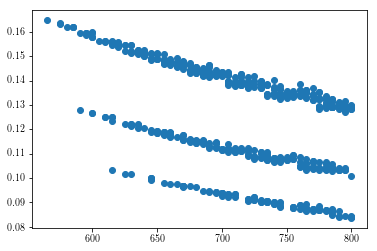

In [77]:
plt.plot(m_f_target,np.array(ECr_h),'o')

In [134]:
4*m_f_target[0]/6,ECr_c[i]
i=0

In [135]:
W_FT_c[14],W_FT_c

(nan, array([129.2376106 ,  91.88885817, 130.34218851, 128.67999208,
        130.09402381, 131.20420877,  93.87927052, 131.54201187,
        128.88426838, 131.47335239,  93.87927052, 131.54201187,
        128.88426838, 131.47335239,          nan,  93.66509692,
         91.97553404,  93.61529851, 131.86942826, 129.70619026,
        128.74294563, 131.8946409 , 129.59007369, 131.82436508,
                 nan,  92.83025723,  91.28249844,  92.37091183,
        130.76087314, 129.35601111, 128.51185233, 130.81295969,
        129.43308026, 130.89233471, 129.95789379,  92.71016318,
        130.96586537, 129.27261023, 130.63745044,          nan,
         93.52612296,  91.65952043,  93.37999273, 132.34192593,
        129.85042559, 128.99066965, 132.15127316, 129.80953808,
        131.99567709,  92.84893695, 131.11734691, 129.36043116,
        131.02160476,          nan,  93.52612296,  91.65952043,
         93.37999273, 132.34192593, 129.85042559, 128.99066965,
        132.15127316, 129.80953808,

In [239]:
i = 14
4*m_f_target[i]/6,ECr_c[i],4*m_f_target[i]/6

(530.0, 0.06546058534468176, 530.0)

In [240]:
HEx_Power(m_f_HEx_c,W_T_HEx_c,W_f_HEx_c,W_p_HEx_c,Ec_HEx_c,4*m_f_target[i]/6,ECr_c[i])

(76.65593733268817, 69.05472226390974, 7.601215068778434)

In [249]:
N_circ_cold = 6
N_circ_hot = 8

W_FT_c = np.zeros(len(m_f_target))
W_Ff_c = np.zeros(len(m_f_target))
W_Fp_c = np.zeros(len(m_f_target))

W_FT_h = np.zeros(len(m_f_target))
W_Ff_h = np.zeros(len(m_f_target))
W_Fp_h = np.zeros(len(m_f_target))


for i in range(len(m_f_target)):
    [W_FT_c[i],W_Ff_c[i],W_Fp_c[i]] = HEx_Power(m_f_HEx_c,W_T_HEx_c,W_f_HEx_c,W_p_HEx_c,Ec_HEx_c,4*m_f_target[i]/N_circ_cold,ECr_c[i])
    [W_FT_h[i],W_Ff_h[i],W_Fp_h[i]] = HEx_Power(m_f_HEx_h,W_T_HEx_h,W_f_HEx_h,W_p_HEx_h,Ec_HEx_h,4*m_f_target[i]/N_circ_hot,ECr_h[i])
    #if W_FT_c[i] == 'Nan':
        #print(4*m_f_target[i]/8,ECr_c[i])
    #if W_FT_c[i] == 'Nan':
        #print(4*m_f_target[i]/8,ECr_h[i])

In [251]:
W_p_valve = (2*np.array(m_f_target)/4/1000)**2*10**5**(2*np.array(m_f_target)/3600)/1000*4/np.array(FE_target)
W_valve   = 8*16

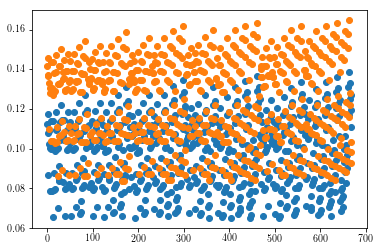

In [252]:
plt.plot(ECr_c,'o')
plt.plot(ECr_h,'o')

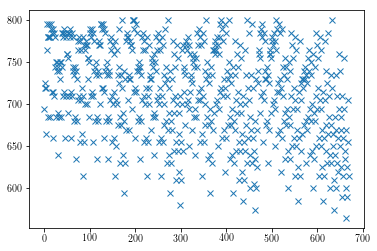

In [253]:
plt.plot(m_f_target,'x')

In [297]:
m_La = 4/np.array(FE_target)*np.array(H_target)*np.array(W_target)*np.array(L_target)*(1-0.45)*7000*10**-9
m_Rt = np.pi*((np.array(R4))**2-np.array(R3)**2)*10**-6*(1.3*np.array(L_target)/1000)*7500 #25**2
m_St = np.pi*((np.array(R2)**2))*10**-6*(1.3*np.array(L_target)/1000)*7500
m_Fe = np.pi*((np.array(R4)+40)**2-np.array(R4)**2)*10**-6*(1.3*np.array(L_target)/1000)*7500 #25**2
m_Nd = m_Rt + m_St + m_Fe
m_w  = (4/np.array(FE_target)*np.array(H_target)*np.array(W_target)*np.array(L_target)*(0.45)*1000*10**-9)

In [298]:
m_T = m_La + m_Rt + m_St + m_Fe + m_w
W_T = W_Ff_c + W_Ff_h + W_Fp_c + W_Fp_h +np.array(W_mag)*4/np.array(FE_target) + np.array(W_pump)*4/np.array(FE_target) + W_valve + W_p_valve

In [300]:
m_p = []
W_pa =[]

m_Nd_p = []
m_La_p = []
m_w_p = []

W_p_CHEx_p = []
W_p_CHEx_f = []
W_p_HHEx_p = []
W_p_HHEx_f = []
W_p_mag = []
W_p_pump = []
W_pa_valve = []
W_pa_p_valve = []


m_f_p = []
FE_p  =[]
f_p = []
L_p = []
H_p = []
W_p = []
B_max_p = []
Tce_p = []
The_p = []

R2_p = []
R3_p = []
R4_p = []


for i in range(len(m_T)):
    #print(i)
    A = 0
    for j in  range(len(m_T)):
        if m_T[i] >= m_T[j] and W_T[i] > W_T[j]:
            A = 1
    if A == 0 :
        #print(m_T[i],W_T[i])
        m_p.append(m_T[i])
        m_Nd_p.append(m_Nd[i])
        m_La_p.append(m_La[i])
        m_w_p.append(m_w[i])
        
        m_f_p.append(m_f_target[i])
        FE_p.append(FE_target[i])
        f_p.append(f_target[i])
        L_p.append(L_target[i])
        H_p.append(H_target[i])
        W_p.append(W_target[i])
        B_max_p.append(B_target[i])
        Tce_p.append(Tce_target[i])
        The_p.append(The_target[i])
        
        R2_p.append(R2[i])
        R3_p.append(R3[i])
        R4_p.append(R4[i])
        
        
        
        W_pa.append(W_T[i])
        W_p_CHEx_p.append(W_Fp_c[i])
        W_p_CHEx_f.append(W_Ff_c[i])
        W_p_HHEx_p.append(W_Fp_h[i])
        W_p_HHEx_f.append(W_Ff_h[i])
        W_p_mag.append(np.array(W_mag[i])*4/np.array(FE_target[i]))
        W_p_pump.append(np.array(W_pump[i])*4/np.array(FE_target[i]))
        W_pa_valve.append(W_valve)
        W_pa_p_valve.append(W_p_valve[i])   

Text(0,0.5,'Power [W]')

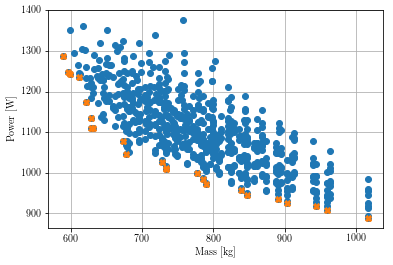

In [301]:
plt.plot(m_T,W_T,'o')
plt.plot(m_p,W_pa,'X')
plt.grid()
plt.xlabel('Mass [kg]')
plt.ylabel('Power [W]')
#plt.savefig('Optimum_2Hz.png',format = 'png', dpi=500,bbox_inches='tight')

In [302]:
m_2Hz = m_p
W_2Hz = W_pa

In [303]:
plt.plot(m_1Hz,W_1Hz,'o', label = 'f = 1 Hz')
plt.plot(m_15Hz,W_15Hz,'o', label = 'f = 1.5 Hz')
plt.plot(m_2Hz,W_2Hz,'o', label = 'f = 2 Hz')
#plt.plot(m_3Hz,W_3Hz,'o', label = 'f = 3 Hz')
#plt.plot(m_4Hz,W_4Hz,'o', label = 'f = 4 Hz')
plt.grid()
plt.xlabel('Mass [kg]')
plt.ylabel('Power [W]')
plt.legend()
plt.savefig('Frequency.png',format = 'png', dpi=500,bbox_inches='tight')

NameError: name 'm_1Hz' is not defined

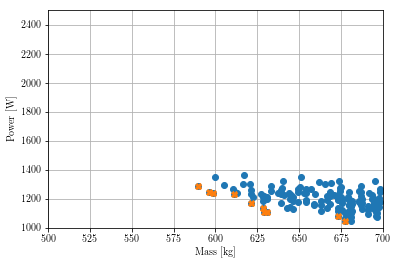

In [304]:
plt.plot(m_T,W_T,'o')
plt.plot(m_p,W_pa,'X')
plt.grid()
plt.xlim([500,700])
plt.ylim([1000,2500])
plt.xlabel('Mass [kg]')
plt.ylabel('Power [W]')
plt.savefig('Optimum_zoom_1Hz.png',format = 'png', dpi=500,bbox_inches='tight')

In [305]:
dP_AMR = np.array(W_pump)/(np.array(m_f_target)/3600)*1000

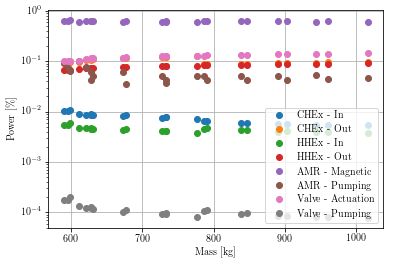

In [306]:
plt.semilogy(m_p,np.array(W_p_CHEx_p)/np.array(W_pa),'o',label = 'CHEx - In')
plt.semilogy(m_p,np.array(W_p_CHEx_f)/np.array(W_pa),'o',label = 'CHEx - Out')
plt.semilogy(m_p,np.array(W_p_HHEx_p)/np.array(W_pa),'o',label = 'HHEx - In')
plt.semilogy(m_p,np.array(W_p_HHEx_f)/np.array(W_pa),'o',label = 'HHEx - Out')
plt.semilogy(m_p,np.array(W_p_mag)/np.array(W_pa),'o',label = 'AMR - Magnetic')
plt.semilogy(m_p,np.array(W_p_pump)/np.array(W_pa),'o',label = 'AMR - Pumping')
plt.semilogy(m_p,np.array(W_pa_valve)/np.array(W_pa),'o',label = 'Valve - Actuation')
plt.semilogy(m_p,np.array(W_pa_p_valve)/np.array(W_pa),'o',label = 'Valve - Pumping')
plt.grid()
plt.xlabel('Mass [kg]')
plt.ylabel('Power [$\%$]')
plt.legend()
plt.savefig('Power_Breakdown.png',format = 'png', dpi=500,bbox_inches='tight')

In [307]:
workbook = xlsxwriter.Workbook('Optimization_results_1Hz.xlsx')
Data = workbook.add_worksheet('Data')

for i in range(len(m_f_p)):
    Data.write(i,0,m_f_p[i]) 
    Data.write(i,1,FE_p[i])
    Data.write(i,2,f_p[i])
    Data.write(i,3,L_p[i])
    Data.write(i,4,H_p[i])
    Data.write(i,5,W_p[i]) 
    Data.write(i,6,B_max_p[i])
    Data.write(i,7,Tce_p[i])
    Data.write(i,8,The_p[i])
    Data.write(i,9,m_p[i])
    Data.write(i,10,m_Nd_p[i])
    Data.write(i,11,m_La_p[i])
    Data.write(i,12,m_w_p[i])
    Data.write(i,13,W_pa[i])
    Data.write(i,14,W_p_CHEx_p[i])
    Data.write(i,15,W_p_CHEx_f[i])
    Data.write(i,16,W_p_HHEx_p[i])
    Data.write(i,17,W_p_HHEx_f[i])
    Data.write(i,18,W_p_mag[i])
    Data.write(i,19,W_p_pump[i])
    Data.write(i,20,R2_p[i])
    Data.write(i,21,R3_p[i])
    Data.write(i,22,R4_p[i])
    

workbook.close()

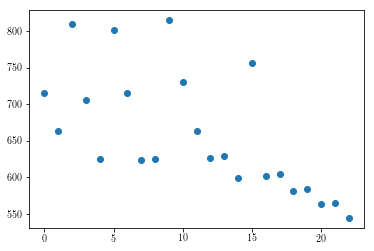

In [308]:
A = W_p_CHEx_f +W_p_CHEx_p
plt.plot(W_p_mag,'o')

In [309]:
W_pa

[1110.7960597159658,
 1047.1235342853874,
 1242.4065738561055,
 1110.4675051063023,
 1008.5569001584053,
 1246.9260344447873,
 1135.5375914568465,
 1012.6299607421571,
 972.1011863834876,
 1288.5713509382683,
 1174.1098978412676,
 1078.9876055624316,
 1026.0358027711263,
 985.5888151832055,
 943.9901023247666,
 1235.9423728628226,
 999.8065177812388,
 957.3658989853099,
 925.4550951429043,
 936.0709899763563,
 907.4972646697432,
 916.8625093788762,
 888.5572727655237]

In [310]:
len(W_p_valve)

670

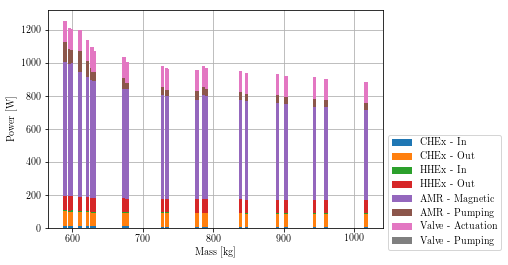

In [311]:
width = 5
plt.grid(zorder = 0)
plt.bar(m_p,W_p_CHEx_p, width, label = 'CHEx - In',zorder = 3)
plt.bar(m_p,W_p_HHEx_f, width, bottom = W_p_CHEx_p, label = 'CHEx - Out',zorder = 3)
plt.bar(m_p,W_p_HHEx_p, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f), label = 'HHEx - In',zorder = 3)
plt.bar(m_p,W_p_HHEx_f, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p), label = 'HHEx - Out',zorder = 3)
plt.bar(m_p,W_p_mag, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p)+ np.array(W_p_HHEx_f), label = 'AMR - Magnetic',zorder = 3)
plt.bar(m_p,W_p_pump, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p)+ np.array(W_p_HHEx_f)+ np.array(W_p_mag) , label = 'AMR - Pumping',zorder = 3)
plt.bar(m_p,W_pa_valve, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p)+ np.array(W_p_HHEx_f) + np.array(W_p_mag) + np.array(W_p_pump) , label = 'Valve - Actuation',zorder = 3)
plt.bar(m_p,W_pa_p_valve, width, bottom = np.array(W_p_CHEx_p) + np.array(W_p_HHEx_f)+ np.array(W_p_HHEx_p)+ np.array(W_p_HHEx_f)+ np.array(W_p_mag) + np.array(W_p_pump)+ np.array(W_pa_valve), label = 'Valve - Pumping',zorder = 3)

#plt.xlim([575,865])
plt.xlabel('Mass [kg]')
plt.ylabel('Power [W]')
plt.legend(bbox_to_anchor = (1,0.45))
plt.savefig('Power_Breakdown.png',format = 'png', dpi=500,bbox_inches='tight')

In [32]:
m_Rt_p = np.pi*((np.array(R4_p))**2-np.array(R3_p)**2)*10**-6*(1.3*np.array(L_p)/1000)*7500 #25**2
m_St_p = np.pi*((np.array(R2_p)**2))*10**-6*(1.3*np.array(L_p)/1000)*7500
m_Fe_p_10 = np.pi*((np.array(R4_p)+10)**2-np.array(R4_p)**2)*10**-6*(1.3*np.array(L_p)/1000)*7500 #25**2 
m_Fe_p_20 = np.pi*((np.array(R4_p)+20)**2-(np.array(R4_p)+10)**2)*10**-6*(1.3*np.array(L_p)/1000)*7500 #25**2 
m_Fe_p_40 = np.pi*((np.array(R4_p)+40)**2-(np.array(R4_p)+20)**2)*10**-6*(1.3*np.array(L_p)/1000)*7500 #25**2 
m_Fe_p_80 = np.pi*((np.array(R4_p)+80)**2-(np.array(R4_p)+40)**2)*10**-6*(1.3*np.array(L_p)/1000)*7500 #25**2 

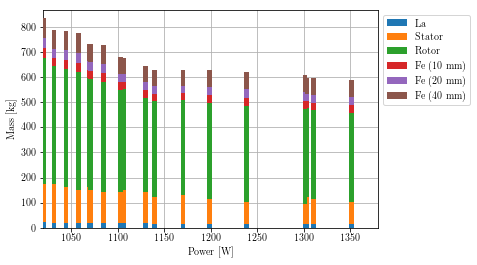

In [33]:
width = 5
plt.grid(zorder = 0)
plt.bar(W_pa,m_La_p, width, label = 'La',zorder = 3)
plt.bar(W_pa,m_St_p, width,bottom = m_La_p, label = 'Stator',zorder = 3)
plt.bar(W_pa,m_Rt_p, width,bottom = np.array(m_La_p) + np.array(m_St_p), label = 'Rotor',zorder = 3)
plt.bar(W_pa,m_Fe_p_10, width,bottom = np.array(m_La_p) + np.array(m_St_p)+ np.array(m_Rt_p), label = 'Fe (10 mm)',zorder = 3)
plt.bar(W_pa,m_Fe_p_20, width,bottom = np.array(m_La_p) + np.array(m_St_p)+ np.array(m_Rt_p)+ np.array(m_Fe_p_10), label = 'Fe (20 mm)',zorder = 3)
plt.bar(W_pa,m_Fe_p_40, width,bottom = np.array(m_La_p) + np.array(m_St_p)+ np.array(m_Rt_p)+ np.array(m_Fe_p_10)+ np.array(m_Fe_p_20), label = 'Fe (40 mm)',zorder = 3)
#plt.bar(W_pa,m_Fe_p_80, width,bottom = np.array(m_La_p) + np.array(m_St_p)+ np.array(m_Rt_p)+ np.array(m_Fe_p_10)+ np.array(m_Fe_p_20)+ np.array(m_Fe_p_40), label = 'Fe (80 mm)',zorder = 3)
plt.legend( bbox_to_anchor=[1, 1])
plt.ylabel('Mass [kg]')
plt.xlabel('Power [W]')
plt.xlim(1020,1380)
plt.ylim(0,865)
plt.savefig('Mass_Breakdown.png',format = 'png', dpi=500,bbox_inches='tight')

In [350]:
m_p,W_pa

([547.3461510436598,
  578.1398339227358,
  578.1398339227358,
  627.3799937068287,
  539.5281614747472,
  569.8078173744883,
  569.8078173744883,
  619.4355363457884,
  672.1928504001737,
  558.3740524932781,
  607.7950051994543,
  660.7312387688409,
  717.0057070935186,
  645.7821930244203,
  702.0269411918933,
  761.8185637868634,
  683.7693808493862,
  743.3226436149461,
  743.3226436149461,
  743.3226436149461,
  806.6314204802084,
  806.6314204802084,
  806.6314204802084,
  806.6314204802084],
 [3965.467777940757,
  3176.48811020731,
  2975.5014594998843,
  2580.270608900632,
  4113.808404705641,
  3304.5459808503997,
  3309.7860228695763,
  2638.5328715420774,
  2354.9983156209305,
  3552.6890788967535,
  2783.9219595551976,
  2408.6538222047443,
  2186.362939373506,
  2504.428568612959,
  2236.401214905834,
  2029.3788177217214,
  2325.165747734164,
  2162.4713813064373,
  2076.4806664997504,
  2173.741955433522,
  1979.6042827249137,
  2026.9102979631257,
  1941.7459097677795,

In [121]:
len(W_pa)

23

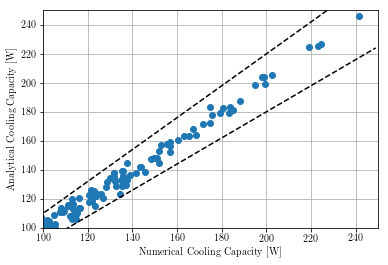

In [105]:
erro_Qc = np.arange(-100,250)
plt.plot(Q_c,np.array(Qc_rg)/16,'o')
plt.plot(erro_Qc,1.1*erro_Qc,'k--')
plt.plot(erro_Qc,0.9*erro_Qc,'k--')
plt.grid()
plt.ylabel('Analytical Cooling Capacity [W]')
plt.xlabel('Numerical Cooling Capacity [W]')
plt.xlim(100,250)
plt.ylim(100,250)
plt.savefig('Qc_fit.png',format = 'png', dpi=500,bbox_inches='tight')

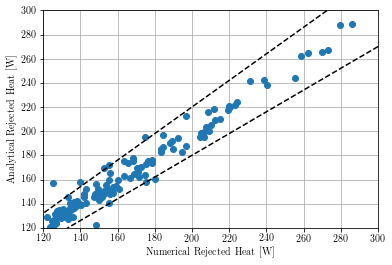

In [106]:
erro_Qh = np.arange(-100,350)
plt.plot(Q_h,np.array(Qh_rg)/16,'o')
plt.plot(erro_Qh,1.1*erro_Qh,'k--')
plt.plot(erro_Qh,0.9*erro_Qh,'k--')
plt.grid()
plt.ylabel('Analytical Rejected Heat [W]')
plt.xlabel('Numerical Rejected Heat [W]')
plt.xlim(120,300)
plt.ylim(120,300)
plt.savefig('Qh_fit.png',format = 'png', dpi=500,bbox_inches='tight')

Text(0.5,0,'Numerical Pumping Power [W]')

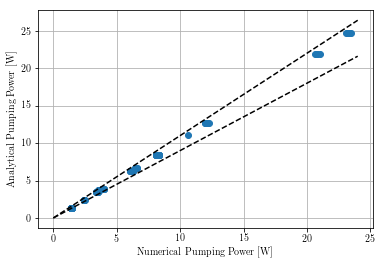

In [107]:
erro_Wp = np.arange(0,25)
plt.plot(W_p,W_pump_rg,'o')

plt.plot(erro_Wp,1.1*erro_Wp,'k--')
plt.plot(erro_Wp,0.9*erro_Wp,'k--')
plt.grid()
plt.ylabel('Analytical Pumping Power [W]')
plt.xlabel('Numerical Pumping Power [W]')
#plt.xlim(120,300)
#plt.ylim(120,300)

### Closure Relations

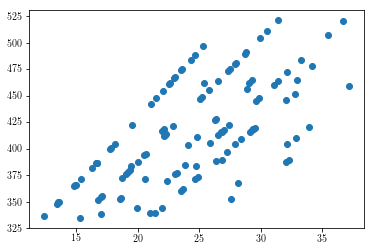

In [110]:
plt.plot(N_r,R4,'o')

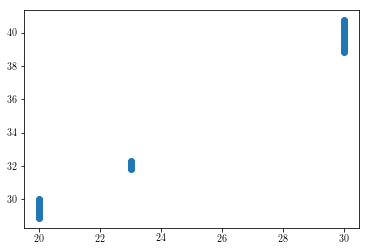

In [106]:
plt.plot(H,np.array(R3)-np.array(R2),'o')

Regenerator arranges